# NAIVE BAYES ALGORITHM

## Importing all the necessary modules

In [410]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt          
import datetime as dt 
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV

## Importing the data from an external source into the Python environment

In [411]:
data = pd.read_csv('claims.csv')
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [412]:
data.shape

(1100, 10)

## Performing necessary Datatype Conversions on the data

In [413]:
data.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent'],
      dtype='object')

In [414]:
data['claim_amount'] = data['claim_amount'].str.replace('$','').astype('float','int')

In [415]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No


In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   float64
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 86.1+ KB


## Data Duplicacy: Chech if their is duplicate data or not

In [417]:
data.duplicated().sum()

0

## Missing value detection and treatment

In [418]:
data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [419]:
def miss_value_treat(s):
    if s.dtype == 'O':
        s = s.fillna(s.mode())
    else:
        s = s.fillna(s.median())
    return s

In [420]:
data = data.apply(miss_value_treat)

In [421]:
data.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

## Outlier Detection and Treatment on the numerical data

<Axes: >

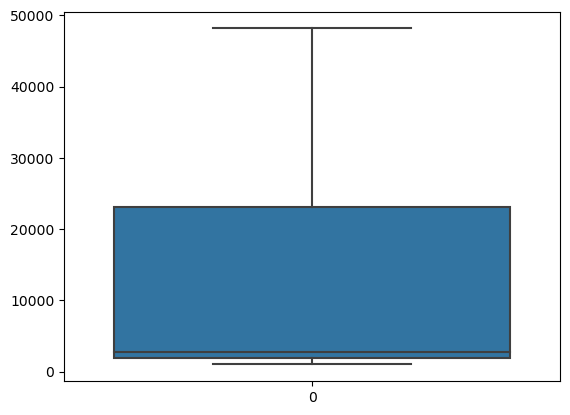

In [423]:
sns.boxplot(data.claim_amount)

<Axes: >

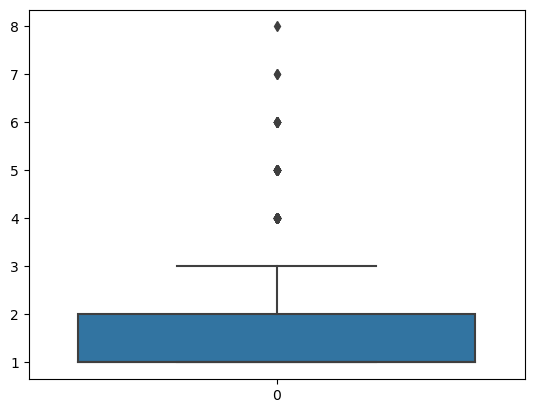

In [422]:
sns.boxplot(data.total_policy_claims)

In [432]:
f_q = data.total_policy_claims.quantile(0.25)
t_q = data.total_policy_claims.quantile(0.75)
p_1 = data.total_policy_claims.quantile(0.01)
p_99 =data.total_policy_claims.quantile(0.99)

In [433]:
print("First quartile:",f_q)
print("Third quartile:",t_q)
print("Bottom 1%ile cutoff:",p_1)
print("Top 1%ile cutoff:",p_99)

First quartile: 1.0
Third quartile: 2.0
Bottom 1%ile cutoff: 1.0
Top 1%ile cutoff: 6.0


In [434]:
#iqr = q3 - q1
iqr = 2.0 - 1.0
iqr

1.0

In [435]:
lc = 1.0 - (1.5*iqr)
lc

-0.5

In [436]:
uc = 2.0 + (1.5*iqr)
uc

3.5

In [437]:
data['total_policy_claims'] = data.total_policy_claims.clip(lower = lc, upper = uc)

<Axes: >

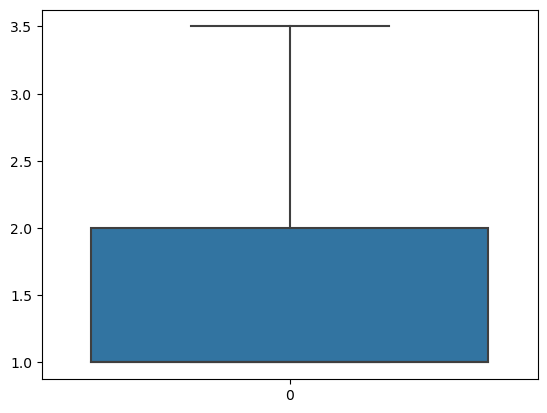

In [438]:
sns.boxplot(data.total_policy_claims)

## Checking the value count and nunique of categorical variables

In [439]:
data.select_dtypes(['object']).nunique()

incident_cause      5
claim_date        100
claim_area          2
police_report       3
claim_type          3
fraudulent          2
dtype: int64

In [440]:
data['incident_cause'].value_counts()

incident_cause
Other causes          290
Driver error          262
Other driver error    249
Natural causes        189
Crime                 110
Name: count, dtype: int64

In [441]:
data['claim_date'].value_counts()

claim_date
04/04/2018    18
10/17/2017    17
07/07/2018    17
01/13/2018    17
10/03/2018    16
              ..
06/10/2018     6
01/26/2018     6
08/04/2017     6
08/18/2017     6
08/23/2018     5
Name: count, Length: 100, dtype: int64

In [442]:
data['claim_area'].value_counts()

claim_area
Auto    985
Home    115
Name: count, dtype: int64

In [443]:
data['police_report'].value_counts()

police_report
No         630
Unknown    300
Yes        170
Name: count, dtype: int64

In [444]:
data['claim_type'].value_counts()

claim_type
Material only          663
Material and injury    241
Injury only            196
Name: count, dtype: int64

In [445]:
data['fraudulent'].value_counts()

fraudulent
No     846
Yes    254
Name: count, dtype: int64

<Axes: xlabel='fraudulent'>

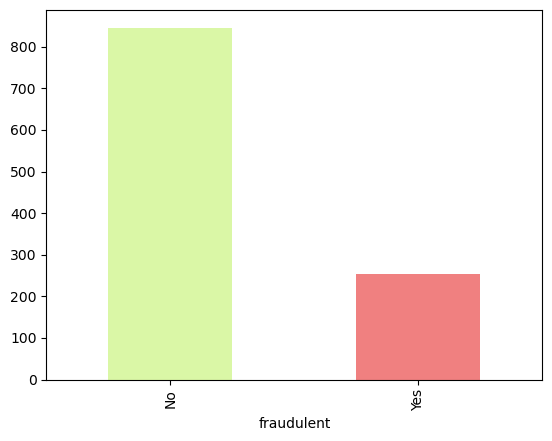

In [446]:
data['fraudulent'].value_counts().plot(kind='bar',color=['#DAF7A6','#F08080'])

<Axes: xlabel='police_report'>

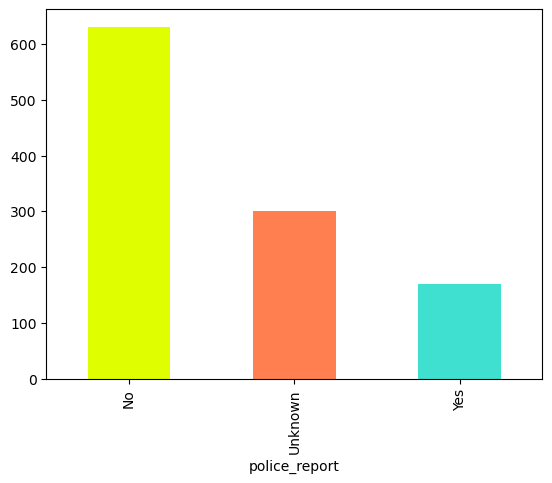

In [447]:
data['police_report'].value_counts().plot(kind='bar',color=['#DFFF00','#FF7F50','#40E0D0'])

<Axes: xlabel='claim_area'>

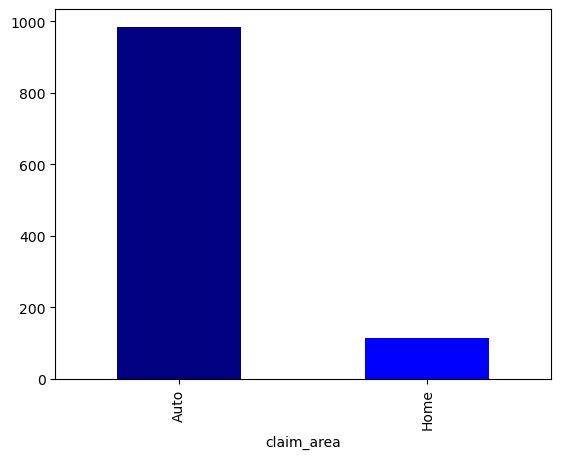

In [448]:
data['claim_area'].value_counts().plot(kind='bar',color=['#000080','#0000FF'])

<Axes: xlabel='claim_type'>

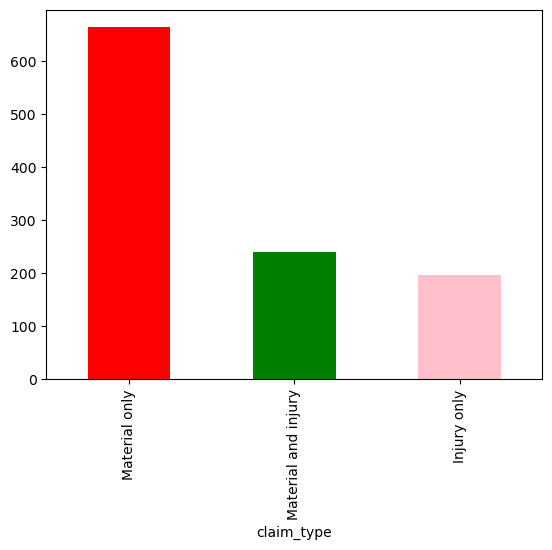

In [449]:
data['claim_type'].value_counts().plot(kind='bar',color=['red','green','pink'])

## Binning

In [450]:
data.claim_amount.max()

48150.5

In [451]:
data.claim_amount.min()

1000.0

In [452]:
data_binned = pd.Series(pd.cut(data.claim_amount,range(0,50000,10000)))

In [453]:
data_binned

0           (0, 10000]
1           (0, 10000]
2           (0, 10000]
3           (0, 10000]
4           (0, 10000]
             ...      
1095        (0, 10000]
1096        (0, 10000]
1097    (20000, 30000]
1098    (20000, 30000]
1099    (30000, 40000]
Name: claim_amount, Length: 1100, dtype: category
Categories (4, interval[int64, right]): [(0, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000]]

In [454]:
data['data_binned'] = data_binned

In [455]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]"


In [456]:
data_1 = data.copy()

In [457]:
data_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]"


In [458]:
data_1['claim_group'] = np.where(data_1.claim_amount<=10000,'very low',np.where(data_1.claim_amount<=20000,'low',np.where(data_1.claim_amount<=30000,'medium',np.where(data_1.claim_amount<=40000,'high','very high'))))

In [459]:
data_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned,claim_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",very low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",very low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",very low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",very low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",very low


In [460]:
data_1.total_policy_claims.max()

3.5

In [461]:
data_1.total_policy_claims.min()

1.0

In [462]:
data_1['total_policy_group'] = np.where(data_1.total_policy_claims<=3,'low',np.where(data_1.total_policy_claims<=6,'medium','high'))

In [463]:
data_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned,claim_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",very low,low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",very low,low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",very low,low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",very low,low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",very low,low


In [464]:
data_1 = data_1.drop(columns=['claim_amount','total_policy_claims','data_binned'])

In [465]:
data_1 = data_1.drop(columns=['claim_id','customer_id','claim_date'])

In [466]:
data_1.head()

,incident_cause,claim_area,police_report,claim_type,fraudulent,claim_group,total_policy_group
0,Driver error,Auto,No,Material only,No,very low,low
1,Crime,Home,Unknown,Material only,No,very low,low
2,Other driver error,Auto,No,Material only,Yes,very low,low
3,Natural causes,Auto,No,Material only,No,very low,low
4,Crime,Auto,No,Material only,No,very low,low


In [467]:
data_1['fraudulent']= np.where(data_1['fraudulent']=='No',0,1)

In [468]:
data_1.head()

,incident_cause,claim_area,police_report,claim_type,fraudulent,claim_group,total_policy_group
0,Driver error,Auto,No,Material only,0,very low,low
1,Crime,Home,Unknown,Material only,0,very low,low
2,Other driver error,Auto,No,Material only,1,very low,low
3,Natural causes,Auto,No,Material only,0,very low,low
4,Crime,Auto,No,Material only,0,very low,low


## one-hot encoding to convert the variables into numerical columns

In [469]:
data_1.columns

Index(['incident_cause', 'claim_area', 'police_report', 'claim_type',
       'fraudulent', 'claim_group', 'total_policy_group'],
      dtype='object')

In [470]:
data_1 = pd.get_dummies(data_1,columns = ['incident_cause','claim_area','police_report','claim_type','claim_group','total_policy_group'],dtype=int)

In [471]:
data_1.head()

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,claim_group_high,claim_group_low,claim_group_medium,claim_group_very high,claim_group_very low,total_policy_group_low,total_policy_group_medium
0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0


In [472]:
data_1.shape

(1100, 21)

In [473]:
data.shape

(1100, 11)

In [474]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]"


In [475]:
data_1['claim_amount'] = data['claim_amount']
data_1['total_policy_claims'] = data['total_policy_claims']

In [476]:
data_1.head()

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,claim_type_Material only,claim_group_high,claim_group_low,claim_group_medium,claim_group_very high,claim_group_very low,total_policy_group_low,total_policy_group_medium,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,1,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,2680.0,1.0


In [477]:
data_1.isna().sum()

fraudulent                           0
incident_cause_Crime                 0
incident_cause_Driver error          0
incident_cause_Natural causes        0
incident_cause_Other causes          0
incident_cause_Other driver error    0
claim_area_Auto                      0
claim_area_Home                      0
police_report_No                     0
police_report_Unknown                0
police_report_Yes                    0
claim_type_Injury only               0
claim_type_Material and injury       0
claim_type_Material only             0
claim_group_high                     0
claim_group_low                      0
claim_group_medium                   0
claim_group_very high                0
claim_group_very low                 0
total_policy_group_low               0
total_policy_group_medium            0
claim_amount                         0
total_policy_claims                  0
dtype: int64

## Split train-test data

In [478]:
x = data_1.drop(['fraudulent'],axis=1)

y = data_1['fraudulent']                 

In [479]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [480]:
x_train.shape, x_test.shape

((880, 22), (220, 22))

In [481]:
y_train.shape, y_test.shape  

((880,), (220,))

In [482]:
x_train.isna().sum()

incident_cause_Crime                 0
incident_cause_Driver error          0
incident_cause_Natural causes        0
incident_cause_Other causes          0
incident_cause_Other driver error    0
claim_area_Auto                      0
claim_area_Home                      0
police_report_No                     0
police_report_Unknown                0
police_report_Yes                    0
claim_type_Injury only               0
claim_type_Material and injury       0
claim_type_Material only             0
claim_group_high                     0
claim_group_low                      0
claim_group_medium                   0
claim_group_very high                0
claim_group_very low                 0
total_policy_group_low               0
total_policy_group_medium            0
claim_amount                         0
total_policy_claims                  0
dtype: int64

In [483]:
y_train.isna().sum()

0

In [484]:
x_train.head()

,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,...,claim_type_Material only,claim_group_high,claim_group_low,claim_group_medium,claim_group_very high,claim_group_very low,total_policy_group_low,total_policy_group_medium,claim_amount,total_policy_claims
900,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,1680.0,1.0
895,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,30340.0,1.0
465,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,25580.0,1.0
422,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0,39280.0,3.0
200,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,40660.0,1.0


In [485]:
x_test.head()

,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,...,claim_type_Material only,claim_group_high,claim_group_low,claim_group_medium,claim_group_very high,claim_group_very low,total_policy_group_low,total_policy_group_medium,claim_amount,total_policy_claims
395,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,1,36075.5,3.5
860,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,34530.0,1.0
477,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,31450.0,1.0
671,0,0,0,1,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,2900.0,3.0
1002,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,1,0,2500.0,2.0


## Building a Naive Bayes Model:

In [486]:
from sklearn.naive_bayes import GaussianNB  #Gaussian distribution Normal distribution,so you don't have to do any transformation to achieve normal distribution , it is done automatically by the GaussianNB().
gnb = GaussianNB()

# fit the model
gnb.fit(x_train,y_train)

GaussianNB()

In [487]:
y_train_pred = gnb.predict(x_train)

In [488]:
y_train_pred = pd.Series(y_train_pred)

In [489]:
Model_data_train = pd.DataFrame(y_train)

In [490]:
Model_data_train['y_pred'] = y_train_pred

In [491]:
Model_data_train

,fraudulent,y_pred
900,0,NaN
895,0,NaN
465,0,0.0
422,0,0.0
200,0,0.0
...,...,...
1033,0,NaN
763,0,0.0
835,0,0.0
559,0,0.0


In [492]:
pd.crosstab(Model_data_train.fraudulent,Model_data_train.y_pred, margins = True)

y_pred,0.0,1.0,All
fraudulent,,,
0,508,47,555
1,148,16,164
All,656,63,719


In [493]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[643  36]
 [166  35]]

True Positives(TP) =  643

True Negatives(TN) =  35

False Positives(FP) =  36

False Negatives(FN) =  166


(2, 2)

<Axes: >

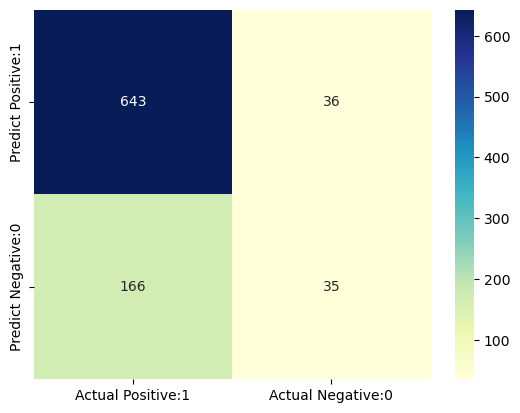

In [494]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [495]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       679
           1       0.49      0.17      0.26       201

    accuracy                           0.77       880
   macro avg       0.64      0.56      0.56       880
weighted avg       0.73      0.77      0.73       880



In [496]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.7705
